In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [12]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [13]:
X_train = mnist.train.images.reshape((-1, 28, 28))
X_test = mnist.test.images.reshape((-1, 28, 28))

In [14]:
y_train = mnist.train.labels
y_test = mnist.test.labels

In [3]:
import matplotlib.pyplot as plt

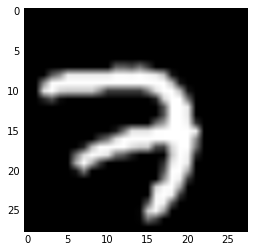

In [16]:
%matplotlib inline
plt.imshow(X_train[0], cmap='gray')
plt.show()

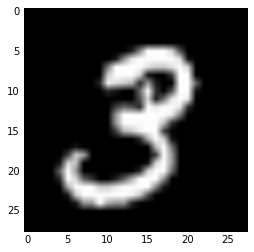

In [17]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [4]:
import numpy as np

In [5]:
def make_fake_dataset(X, y, n_cat, min_digits, chance_to_drop=0.5, reuse=True, 
                      size=None):
#     if not reuse:
#         raise NotImplementedError("Sorry, I didn't prepare that option yet.")
    if size is None:
        size = len(X)
    ids = np.arange(len(X))
    np.random.shuffle(ids)

    c = np.random.choice(ids, size*n_cat, replace=reuse)
    c = c.reshape([size, n_cat])
    data = np.ndarray(shape=[size, n_cat, 28, 28])
    labels = np.ndarray(shape=[size, n_cat, 10])
    for i in range(n_cat):
        spot_keys = c[: , i]
        labels[:, i, :] = y[spot_keys]
        data[:, i, :, :] = X[spot_keys]
    
    blackout = np.ones(min_digits, dtype=bool)
    for i in range(min_digits, n_cat):
        round_dropped = (np.random.uniform(size=len(data)) > chance_to_drop)
        blackout = round_dropped & blackout
        data[~blackout, i, :, :] = 0
        labels[~blackout, i, :] = 0
    data = np.concatenate(data.swapaxes(0, 1), axis=2)
    return data, labels

In [21]:
X_t, y_t = make_fake_dataset(X_train[:10], y_train[:10], 3, 1)

In [22]:
X_t.shape

(10, 28, 84)

In [23]:
y_t.shape

(10, 3, 10)

In [24]:
y_t.argmax(axis=2)

array([[0, 0, 0],
       [4, 1, 0],
       [1, 0, 0],
       [6, 8, 0],
       [8, 0, 0],
       [1, 0, 0],
       [9, 0, 0],
       [1, 0, 0],
       [6, 0, 0],
       [7, 0, 0]], dtype=int64)

In [25]:
np.array([2]).astype(str)

array(['2'], 
      dtype='<U11')

In [6]:
def one_hot_to_dense(mat):
    none_loc = (mat == 0).all(axis=1)
    dense = mat.argmax(axis=1)
    dense = dense.astype(str)
    dense[none_loc] = '_'
    return dense

In [7]:
def plot_random():
    c = np.random.choice(np.arange(len(X_t)))
    plt.imshow(X_t[c], cmap='Greys')
    plt.title(''.join([str(x) for x in one_hot_to_dense(y_t[c])]))
    plt.show()

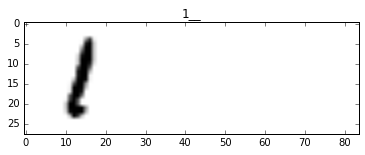

In [28]:
plot_random()

In [32]:
len(X_train)

55000

In [33]:
len(X_test)

10000

In [36]:
X_train_prime, y_train_prime = make_fake_dataset(X_train, y_train, 5, 1, chance_to_drop=0.3, size=11000, reuse=False)

In [37]:
X_test_prime, y_test_prime = make_fake_dataset(X_test, y_test, 5, 1, chance_to_drop=0.3, size=2000, reuse=False)

In [1]:
import pickle

In [100]:
with open('smaller_mnist_catted_dset.pkl', 'wb') as f:
    t = {'X_train': X_train_prime,
         'X_test': X_test_prime,
         'y_train': y_train_prime,
         'y_test': y_test_prime}
    pickle.dump(t, f)

In [9]:
with open('./smaller_mnist_catted_dset.pkl', 'rb') as f:
    t = pickle.load(f)

In [10]:
X_train_prime = t['X_train']
X_test_prime = t['X_test']
y_train_prime = t['y_train']
y_test_prime = t['y_test']
del t

In [11]:
def validation_split(X, y, percent_validation=0.2):
    len_train = int(len(X) * (1-percent_validation))
    len_valid = len(X) - len_train
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    return X[:len_train], y[:len_train], X[len_train:], y[len_train:]

In [12]:
X_train_prime, y_train_prime, X_valid_prime, y_valid_prime = validation_split(X_train_prime, y_train_prime)

In [16]:
X_train_prime = X_train_prime - 0.5
X_valid_prime = X_valid_prime - 0.5
X_test_prime = X_test_prime - 0.5

In [17]:
with open('smaller_mnist_catted_dset.pkl', 'wb') as f:
    t = {'X_train': X_train_prime,
         'X_test': X_test_prime,
         'X_valid': X_valid_prime,
         'y_valid': y_valid_prime,
         'y_train': y_train_prime,
         'y_test': y_test_prime}
    pickle.dump(t, f)